# PN2V Training
Here we will use the generated noise model and train a PN2V network on single noisy images.
Please run the 'Mouse-0-getData' and 'Mouse-1-CreateNoiseModel' notebooks first.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from unet.model import UNet

from pn2v import utils
from pn2v import histNoiseModel
from pn2v import training
from tifffile import imread
import torch
# See if we can use a GPU
device=utils.getDevice()

CUDA available? True


### Load Data

In [2]:
path="data/Confocal_MICE/raw/"

# Load the training data
data=np.load(path+'training_raw.npy').astype(np.float32)

In [3]:
# We are loading the histogram from the 'Convallaria-1-CreateNoiseModel' notebook
histogram=np.load(path+'noiseModel.npy')


# Create a NoiseModel object from the histogram.
noiseModel=histNoiseModel.NoiseModel(histogram, device=device)

### Create the Network and Train it
This can take a while.

In [4]:
numberOfRuns=1 # If you want to run multiple repetitions of the training you can increse this.
for i in range (numberOfRuns):
    torch.manual_seed(i)
    # Create a network with 800 output channels that are interpreted as samples from the prior.
    net = UNet(800, depth=3)

    path="data/Confocal_MICE/raw/"

    # Split training and validation data.
    my_train_data=data[:-5].copy()
#    np.random.shuffle(my_train_data)
    my_val_data=data[-5:].copy()
#    np.random.shuffle(my_val_data)

    # Start training.
    trainHist, valHist = training.trainNetwork(net=net, trainData=my_train_data, valData=my_val_data,
                                               postfix='mouse'+str(i), directory=path, noiseModel=noiseModel,
                                               device=device, numOfEpochs= 200, stepsPerEpoch=50, 
                                               virtualBatchSize=20, batchSize=4, learningRate=1e-4)

/home/krull/projects/pn2vCheck/pn2v/unet/model.py:215: UserWarning: nn.init.xavier_normal is now deprecated in favor of nn.init.xavier_normal_.
  init.xavier_normal(m.weight)
/home/krull/projects/pn2vCheck/pn2v/unet/model.py:216: UserWarning: nn.init.constant is now deprecated in favor of nn.init.constant_.
  init.constant(m.bias, 0)


Epoch 0 finished      
avg. loss: 3.3755523324012757+-(2SEM)0.05753647769403991      
Epoch 1 finished      
avg. loss: 3.3059229493141173+-(2SEM)0.05213364812522584      
Epoch 2 finished      
avg. loss: 3.1944671273231506+-(2SEM)0.05524138325349547      
Epoch 3 finished      
avg. loss: 3.216221034526825+-(2SEM)0.09158025128499919      
Epoch 4 finished      
avg. loss: 3.23487628698349+-(2SEM)0.06558051766971451      
Epoch 5 finished      
avg. loss: 3.218102180957794+-(2SEM)0.04794577101564741      
Epoch 6 finished      
avg. loss: 3.1484243631362916+-(2SEM)0.09757724380888266      
Epoch 7 finished      
avg. loss: 3.2208643555641174+-(2SEM)0.05802314796973129      
Epoch 8 finished      
avg. loss: 3.179555690288544+-(2SEM)0.09108419576160717      
Epoch 9 finished      
avg. loss: 3.2212211012840273+-(2SEM)0.07260445456541452      
Epoch 10 finished      
avg. loss: 3.227928268909454+-(2SEM)0.07875341266335877      
Epoch 11 finished      
avg. loss: 3.1906182050704954+-(2SE

Epoch 91 finished      
avg. loss: 3.1890707492828367+-(2SEM)0.0701974731258899      
Epoch 92 finished      
avg. loss: 3.200565016269684+-(2SEM)0.06870979939347939      
Epoch 93 finished      
avg. loss: 3.233332860469818+-(2SEM)0.05246434807176019      
Epoch 94 finished      
avg. loss: 3.172915256023407+-(2SEM)0.07326703494469357      
Epoch    94: reducing learning rate of group 0 to 7.8125e-07.
Epoch 95 finished      
avg. loss: 3.220873713493347+-(2SEM)0.05878631462636916      
Epoch 96 finished      
avg. loss: 3.1973466873168945+-(2SEM)0.05020564078959813      
Epoch 97 finished      
avg. loss: 3.1826500415802004+-(2SEM)0.06966795987914146      
Epoch 98 finished      
avg. loss: 3.218754434585571+-(2SEM)0.04792158217800392      
Epoch 99 finished      
avg. loss: 3.215173029899597+-(2SEM)0.041225282409779455      
Epoch 100 finished      
avg. loss: 3.24418568611145+-(2SEM)0.03596475798821605      
Epoch 101 finished      
avg. loss: 3.221230661869049+-(2SEM)0.072892648019

Epoch 180 finished      
avg. loss: 3.1971370816230773+-(2SEM)0.04810941225301095      
Epoch 181 finished      
avg. loss: 3.209651303291321+-(2SEM)0.06726999043129615      
Epoch 182 finished      
avg. loss: 3.156476902961731+-(2SEM)0.05999169601405165      
Epoch 183 finished      
avg. loss: 3.200363314151764+-(2SEM)0.044231386173056164      
Epoch 184 finished      
avg. loss: 3.2037535429000856+-(2SEM)0.05318658469974868      
Epoch 185 finished      
avg. loss: 3.2504611372947694+-(2SEM)0.03806888459572012      
Epoch 186 finished      
avg. loss: 3.2713695526123048+-(2SEM)0.049661342307014064      
Epoch 187 finished      
avg. loss: 3.223575437068939+-(2SEM)0.05609808858413251      
Epoch 188 finished      
avg. loss: 3.2136144399642945+-(2SEM)0.06552608482910434      
Epoch 189 finished      
avg. loss: 3.240780210494995+-(2SEM)0.04140558987622666      
Epoch 190 finished      
avg. loss: 3.192579817771912+-(2SEM)0.05173311746235404      
Epoch 191 finished      
avg. loss: 

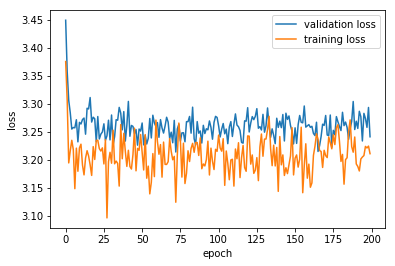

In [5]:
# Let's look at the training and validation loss
plt.xlabel('epoch')
plt.ylabel('loss')
plt.plot(valHist, label='validation loss')
plt.plot(trainHist, label='training loss')
plt.legend()
plt.show()